In [1]:
import networkx as nx
import random


In [2]:
#Number of evolution
NUMBEROFEVOLUTION = 5
#Forgiveness
PFOR = 0.3
#update type
UPDATETYPE = 'st'
#Evolutionary rate
PEVO = 0.7
#Payoffs record
PAYOFFRECORD = []
#Memory record for each agent after each round
MEMORY = {}

number_of_nodes = 500
number_of_edges = 2

In [3]:
#m : Number of edges to attach from a new node to existing nodes
G = nx.barabasi_albert_graph(n = number_of_nodes, m = number_of_edges)


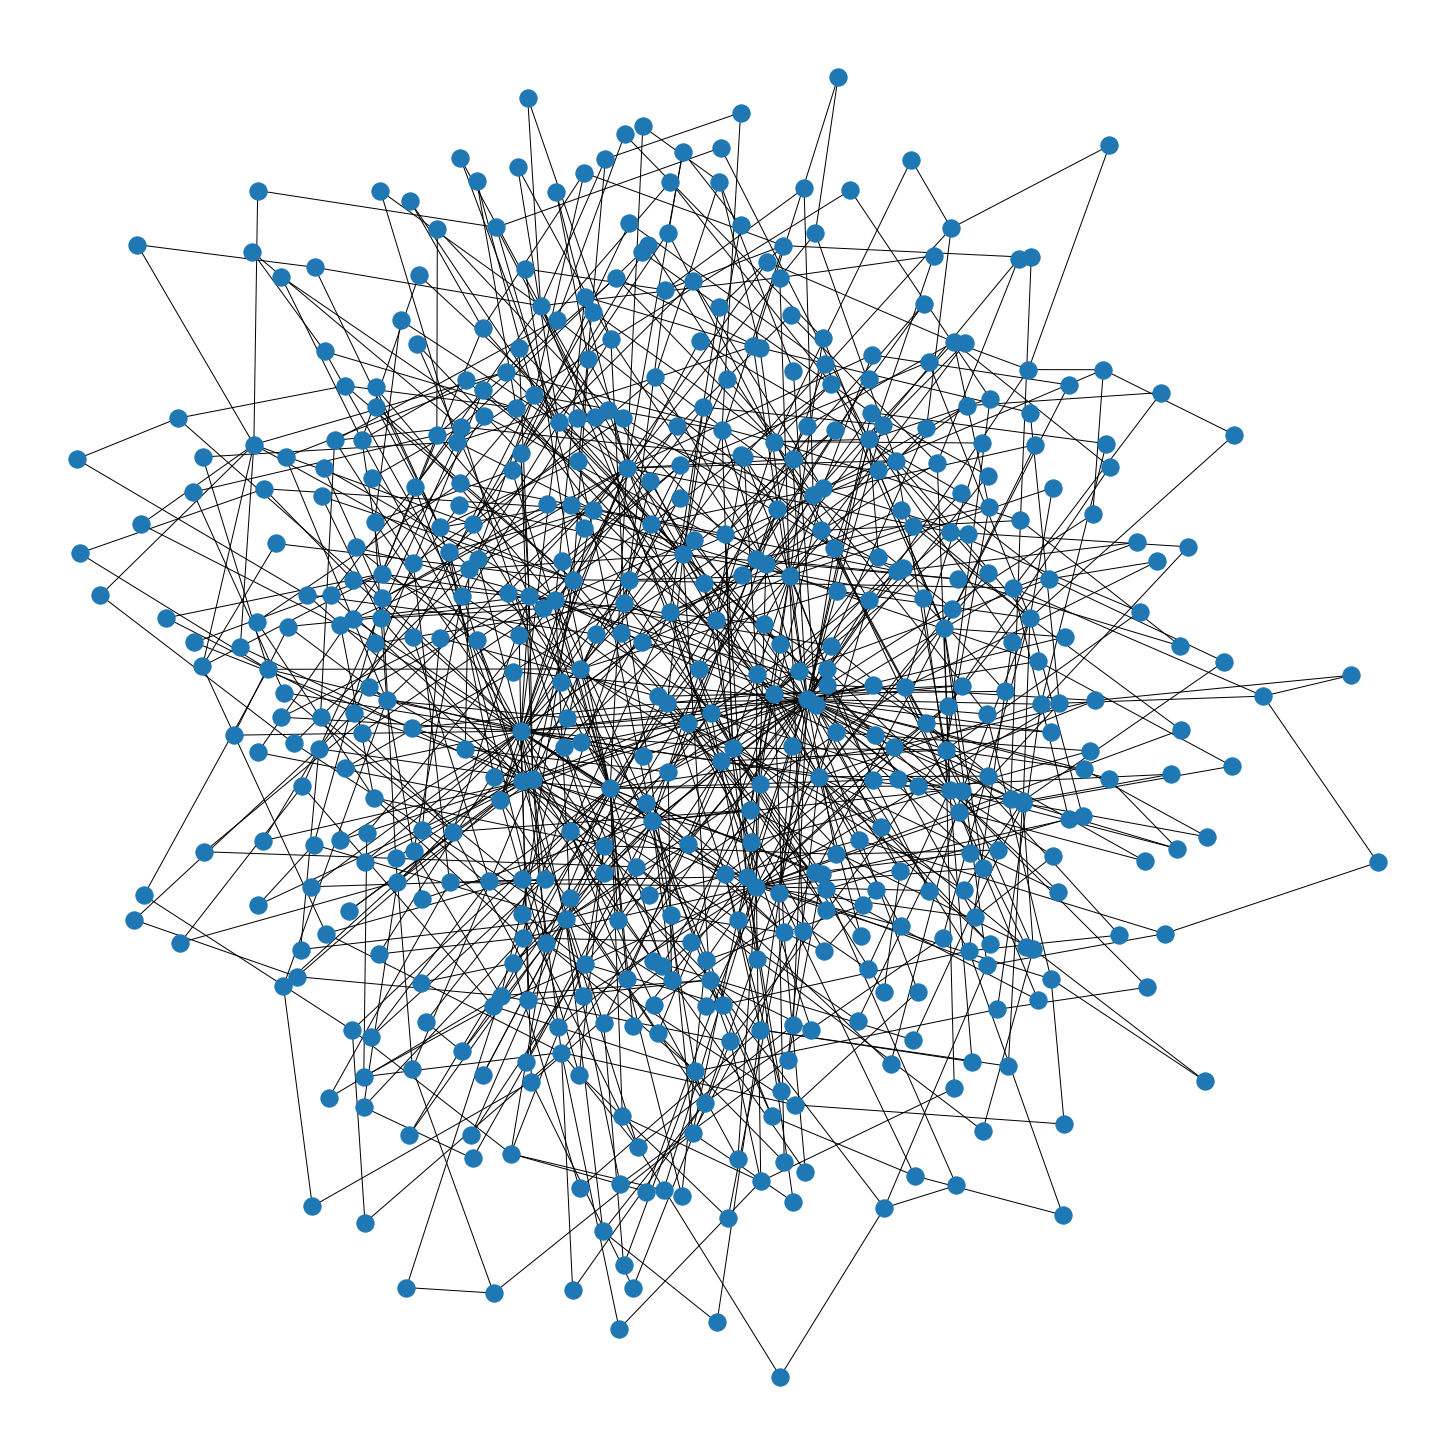

In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20,20))
nx.draw(G)


In [4]:
def play_pd(player, opponent):     
    if (player == 0) and (opponent == 0):
        return 1, 1
    
    elif (player == 0) and (opponent == 1):
        return 5, 0
    
    elif (player == 1) and (opponent == 1):
        return 3, 3
    
    elif (player == 1) and (opponent == 0):
        return 0, 5
        

In [5]:
def decide(player, opponent):
    #UC
    if G.node[player.agent_id]['strategy'] == 0:
        return 1
    #UD
    elif G.node[player.agent_id]['strategy'] == 1:
        return 0
    #TFT
    elif G.node[player.agent_id]['strategy'] == 2:
        # First move
        if not G.node[player.agent_id]['history']:
            return 1
        # React to the opponent's last move
        elif player.agent_id in G.node[opponent.agent_id]['history']:
            if G.node[opponent.agent_id]['history'][player.agent_id] == 1:
                return 1
            else:
                return 0
        #####Code check: if player has history with other opponents but not this opponent, return 1
        else:
            return 1
    #CR
    elif G.node[player.agent_id]['strategy'] == 3:
        #####Code change: if first move
        if not G.node[player.agent_id]['history']:
            return 1
        else:
            return decide_cr(player, opponent)
    #UR
    elif G.node[player.agent_id]['strategy'] == 4:
        #####Code change: if first move
        if not G.node[player.agent_id]['history']:
            return 1
        else:
            return decide_ur(player, opponent)
    #SJ
    elif G.node[player.agent_id]['strategy'] == 5:
        #####Code change: if first move
        if not G.node[player.agent_id]['history']:
            return 1
        else:
            return decide_sj(player, opponent)
    #Print error if not found
    else:
        print('error: undefined strategy type')
        

In [6]:
#A function for CR

def decide_cr(player, opponent):
    #Find common neighbors(agent)
    
    #print(type(player), type(opponent))
    A = player.get_neighboring_agents()
    B = opponent.get_neighboring_agents()
    #A list of common friends
    common_neighbors = [element for element in A if element in B]
    #print(common_neighbors)
    #print(type(common_neighbors[0]))
    #Element type: Player
    
    #If there is no common friends, play randomly
    #print('cr: lenth of common neighbors:', len(common_neighbors))
    if len(common_neighbors) == 0:
        if random.random() > 0.5:
            return 1
        else:
            return 0
    else:
        #randomly select a common friend
        select_rand_friend = random.choice(common_neighbors)
        #print(select.state['id'])
        #Recall last behaviour to thie neighbor
        #If the Other played C against select_rand_friend in the previous step --> cooperate
        if select_rand_friend in G.node[opponent.agent_id]['history']:
            last_move = G.node[opponent.agent_id]['history'][select_rand_friend]
            if last_move == 1:
                return 1
            #If the Other played D against select_rand_friend in the previous step --> defect
            elif last_move == 0:
                #Forgiveness
                #If there is another common friend
                #Find his opinions
                common_neighbors.remove(select_rand_friend)
                if len(common_neighbors) > 0 and (random.random() < PFOR):
                    #Eliminate the guy already choosen from the list of friends
                    #print('common friends:', common_neighbors)
                    #Randomly select anthter friend
                    select_rand_friend_2 = random.choice(common_neighbors)
                    if select_rand_friend_2 in G.node[opponent.agent_id]['history']:
                        last_move_2 = G.node[opponent.agent_id]['history'][select_rand_friend_2]
                        if last_move_2 == 1:
                            return 1
                        elif last_move_2 == 0:
                            return 0
                    else:
                        if random.random() > 0.5:
                            return 1
                        else:
                            return 0
                else:
                    if random.random() > 0.5:
                        return 1
                    else: 
                        return 0     
        #If the Other player did not play against select_rand_friend in the previous step --> play randomly
        else:
            if random.random() > 0.5:
                return 0
            else:
                return 1
        

In [7]:
def decide_ur(player, opponent):
    #Find a list of neighbors of the opponent
    B = opponent.get_neighboring_agents()
    #Eliminate oneself from it
    B.remove(player.agent_id)
    #If the Other player did not play against select_rand_friend in the previous step --> play randomly
    if len(B) == 0:
        if random.random() > 0.5:
            return 1
        else:
            return 0
    else:
        #Select a random friend
        select_rand_friend = random.choice(B)
        if select_rand_friend in G.node[opponent.agent_id]['history']:
            last_move =  G.node[opponent.agent_id]['history'][select_rand_friend]
            if last_move == 1:
                return 1
            else:
                #Give opponent another chance based on another friend
                B.remove(select_rand_friend)
                if len(B) == 0:
                    if random.random() > 0.5:
                        return 1
                    else:
                        return 0
                else:
                    select_rand_friend_2 = random.choice(B)
                    if select_rand_friend_2 in G.node[opponent.agent_id]['history']:
                        last_move_2 = G.node[opponent.agent_id]['history'][select_rand_friend_2]
                        if last_move_2 == 1:
                            return 1
                        elif last_move_2 == 0:
                            return 0
                    else:
                        #If the Other player did not play against select_rand_friend in the previous step --> play randomly
                        if random.random() > 0.5:
                            return 1
                        else:
                            return 0
        else:
            if random.random() > 0.5:
                return 1
            else:
                return 0
    
    

In [8]:
def decide_sj(player, opponent):
    #Find a list of common friends
    A = player.get_neighboring_agents()
    B = opponent.get_neighboring_agents()
    common_neighbors = [element for element in A if element in B]
    #Play randomly if there is no common friends
    if len(common_neighbors) == 0:
        if random.random() > 0.5:
            return 1
        else:
            return 0
    else:
        #Randomly select a common friend
        select_rand_friend = random.choice(common_neighbors)
        if select_rand_friend in G.node[opponent.agent_id]['history']:
            #Action of Other with common friend
            last_move = G.node[opponent.agent_id]['history'][select_rand_friend]
            #Action of common friend with me
            if player.agent_id in G.node[select_rand_friend]['history']:
                last_move_2 = G.node[select_rand_friend]['history'][player.agent_id]
                #If the opponent cooperate with the common friend
                if last_move == 1: 
                    #If the common friend cooperates with the palyer
                    if last_move_2 == 1:
                        return 1
                    elif last_move_2 == 0:
                        return 0     
                elif last_move == 0:
                    if last_move_2 == 1:
                        return 0
                    elif last_move_2 == 0:
                        return 1
            #####Code change: if there is no interaction between common friend and me
            else:
                if random.random() > 0.5:
                    return 1
                else:
                    return 0
        else:
            if random.random() > 0.5:
                return 1
            else:
                return 0
        

In [9]:
#the strategy is randomly selected
#agent: same as 'process' in SimPy but behaviours are limited
#by its network
class Player():
    
    def __init__(self, agent_id):
        #Using agent_id to present strategy
        #0: UC
        #1: UD
        #2: TFT
        #3: CR
        #4: UR
        #5: SJ
        self.agent_id = agent_id
    
    def update_payoff(self, payoff):
        G.node[self.agent_id]['payoff'] += payoff
    
    #decide to cooperate or defect by its strategy
    def update_behavior(self, neighbor):
        #pass
        G.node[self.agent_id]['behavior'] = decide(self, neighbor)
    
    #A dictionary recording last behaviour to a certain neifhbor
    def update_history(self, neighbor):
        #pass
        G.node[self.agent_id]['history'][neighbor] = G.node[self.agent_id]['behavior']
        #print(self.history)
    
    #Update time every time after interacting with all neighbors
    def update_state(self):
        G.node[self.agent_id]['state'] += 1
        
    def get_neighboring_agents(self):
        return list(G.neighbors(self.agent_id))
        
    def update_strategy(self):
        #Copy the best
        if UPDATETYPE == 'st':
            if random.random() < PEVO:
                #All connections
                neighbors = self.get_neighboring_agents()
                #Also take in consideration itself
                neighbors.append(self.agent_id)
                #Find the maximum payoff in i neighbourhood
                max_payoff = max([G.node[neighbor]['payoff'] for neighbor in neighbors])
                #Find who are the agents carrying that payoff
                max_payoffs = [neighbor for neighbor in neighbors if G.node[neighbor]['payoff'] == max_payoff]
                #Randomly choose one of them
                neighbor = random.choice(max_payoffs)
                #Transform itself in that agent
                G.node[self.agent_id]['strategy'] = G.node[neighbor]['strategy']
        #Copy the (strictly) better
        else:
            if random.random() < PEVO:
                #All connections
                neighbors = self.get_neighboring_agents()
                #Also take in consideration itself
                neighbors.append(self.agent_id)
                #Select those who have larger payoffs than myself
                larger_payoffs = [neighbor for neighbor in neighbors if G.node[neighbor]['payoff'] > G.node[self.agent_id]['payoff']]
                if len(larger_payoffs) > 0:
                    #Randomly choose one of them
                    neighbor = random.choice(larger_payoffs)
                    G.node[self.agent_id]['strategy'] = G.node[neighbor]['strategy']                
    
    def game(self):
        my_neighbors = self.get_neighboring_agents()
        for neighbor in my_neighbors:
            #print(neighbor.state['id'])
            if neighbor is None:
                print('error: isolate node - neighbor is None')
            else:
                #If they have played before, do not replay the game
                if self.agent_id in G.node[neighbor]['history']:
                    pass
                else:
                    #print(self.state['id'], neighbor.state['id'])
                    #print(self.history, neighbor.history)
                    #print(self.behavior, neighbor.behavior)
                    
                    neighbor_agent = G.node[neighbor]['agent']
                    #now .behavior is behaviour at t-1
                    #new_behavior is behaviour at t
                    my_new_behavior = self.update_behavior(neighbor_agent)
                    neighbor_new_behavior = neighbor_agent.update_behavior(self)
                    
                    #payoff at time t
                    my_payoff, neighbor_payoff = play_pd(G.node[self.agent_id]['behavior'], G.node[neighbor]['behavior'])
                    
                    #update total payoff
                    self.update_payoff(my_payoff)
                    neighbor_agent.update_payoff(neighbor_payoff)
                    
                    #update history in ordert to make decision fo t+1
                    self.update_history(neighbor)
                    neighbor_agent.update_history(self)
    

In [10]:
def check_convergence():
    #Set up counters
    uc = 0
    ud = 0
    tft = 0
    cr = 0
    ur = 0
    sj = 0
    
    for i in G.nodes:
        if G.node[i]['strategy'] == 0:
            uc += 1
        elif G.node[i]['strategy'] == 1:
            ud += 1
        elif G.node[i]['strategy'] == 2:
            tft += 1
        elif G.node[i]['strategy'] == 3:
            cr += 1
        elif G.node[i]['strategy'] == 4:
            ur += 1
        else:
            sj += 1
            
    rate_uc = uc/number_of_nodes
    rate_ud = ud/number_of_nodes
    rate_tft = tft/number_of_nodes
    rate_cr = cr/number_of_nodes
    rate_ur = ur/number_of_nodes
    rate_sj = sj/number_of_nodes
    
    return rate_uc, rate_ud, rate_tft, rate_cr, rate_ur, rate_sj
    

In [11]:
#Initialise the nodes
for i in range(number_of_nodes):
    #Each node have a dict memory for neighbours' behaviours
    G.node[i]['history'] = {}
    #Record of own payoff after interacting with all neighbours
    G.node[i]['payoff'] = 0
    #Record of own strategy
    G.node[i]['behavior'] = None
    G.node[i]['strategy'] = random.choice(range(6))
    G.node[i]['agent'] = Player(i)
    
#print(G.nodes(data = 'agent'))

In [ ]:
 for i in range(NUMBEROFEVOLUTION):
    for i in range(number_of_nodes):
        G.node[i]['agent'].game()
               
    for i in range(number_of_nodes):
        G.node[i]['agent'].update_strategy()
    
    B = check_convergence()
    print("rate_uc, rate_ud, rate_tft, rate_cr, rate_ur, rate_sj:", B)
    
    #print(G.nodes(data = 'payoff'))

print(nx.algorithms.smallworld.omega(G, niter=100, nrand=10, seed=None))
            
                

rate_uc, rate_ud, rate_tft, rate_cr, rate_ur, rate_sj: (0.07, 0.088, 0.116, 0.49, 0.082, 0.154)
rate_uc, rate_ud, rate_tft, rate_cr, rate_ur, rate_sj: (0.022, 0.036, 0.092, 0.732, 0.046, 0.072)
rate_uc, rate_ud, rate_tft, rate_cr, rate_ur, rate_sj: (0.01, 0.01, 0.084, 0.834, 0.022, 0.04)
rate_uc, rate_ud, rate_tft, rate_cr, rate_ur, rate_sj: (0.008, 0.004, 0.08, 0.858, 0.022, 0.028)
rate_uc, rate_ud, rate_tft, rate_cr, rate_ur, rate_sj: (0.002, 0.004, 0.088, 0.88, 0.014, 0.012)


In [ ]:
#average payoff of?